# Histograms, Auto Contrast Image

In [1]:
from skimage.io import imread, imshow, imsave
from skimage import img_as_float, img_as_ubyte
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

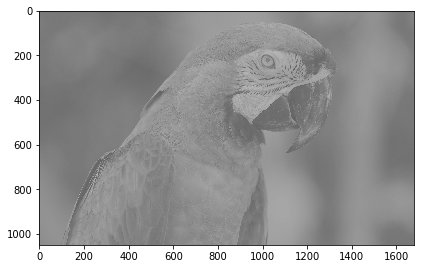

In [2]:
i1 = imread('parrot.png')
imshow(i1)
i1 = img_as_ubyte(i1)

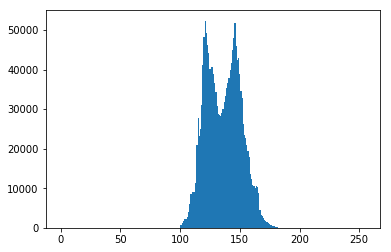

In [3]:
plt.hist(i1.ravel(), bins = 256, range = [0, 255]);

$f(x)=(x-x_{min})\frac{255}{x_{max} - x_{min}}$

In [4]:
i1 = (i1 - i1.min()) * np.uint8(255 // (i1.max() - i1.min()))

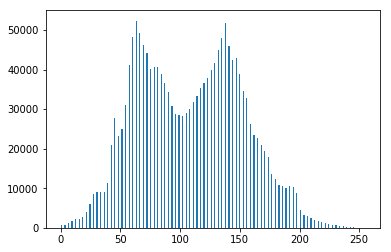

In [5]:
plt.hist(i1.ravel(), bins = 256, range = [0, 255]);

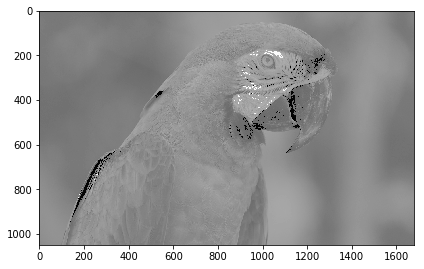

In [5]:
i2 = imread('parrot2.png')
imshow(i2)
i2 = i2.astype('float')

In [12]:
def autocont(img, low, high):
    pix = np.sort(i2.ravel())
    nmin = pix[int(np.round((low / 100) * pix.shape[0]))]
    nmax = pix[int(np.round((high / 100) * pix.shape[0]))]
    i2_2 = (i2 - nmin) * (255 / (nmax - nmin))
    i2_2 = np.clip(i2_2, 0, 255)
    i2_2 = i2_2.astype('uint8')
    imshow(i2_2)
    return i2_2

array([[ 44,  38,  33, ...,  94,  88,  99],
       [ 44,  38,  38, ...,  99,  88,  99],
       [ 44,  38,  38, ...,  99,  94,  99],
       ..., 
       [133, 133, 138, ...,  33,  33,  33],
       [133, 138, 138, ...,  27,  33,  33],
       [133, 133, 133, ...,  27,  27,  33]], dtype=uint8)

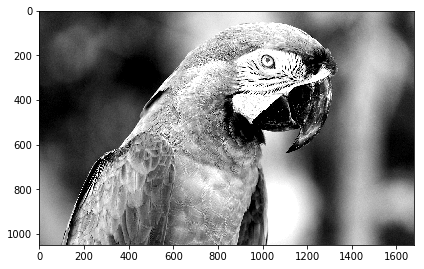

In [13]:
autocont(i2, 5, 95)

<br />
$Y =  0.2126⋅R+0.7152⋅G+0.0722⋅B;$
<br />
$U =−0.0999⋅R−0.3360⋅G+0.4360⋅B;$
<br />
$V =  0.6150⋅R−0.5586⋅G−0.0563⋅B.$

<br />
$f(x)=(x-x_{min})\frac{255}{x_{max} - x_{min}}.$

<br />
$R = Y+1.2803⋅V;$
<br />
$G = Y−0.2148⋅U−0.3805⋅V;$
<br />
$B = Y+2.1279⋅U.$

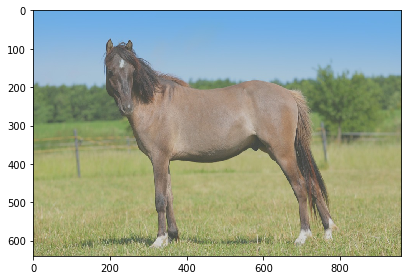

In [3]:
i3 = imread('horse.png')
imshow(i3)
i3 = img_as_float(i3)
R = i3[:, :, 0]
G = i3[:, :, 1]
B = i3[:, :, 2]
Y = 0.2126 * R + 0.7152 * G + 0.0722 * B
U = -0.0999 * R - 0.3360 * G + 0.4360 * B
V = 0.6150 * R - 0.5586 * G - 0.0563 * B

In [4]:
pix = np.sort(Y.ravel())
nmin = pix[int(np.round(0.05 * pix.shape[0]))]
nmax = pix[int(np.round(0.95 * pix.shape[0]))]
i3 = (Y - nmin) * (1 / (nmax - nmin))
i3 = np.clip(i3, 0, 1)

C:\Users\PRINT\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


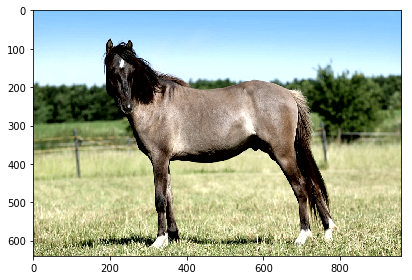

In [5]:
R = i3 + 1.2803 * V  
G = i3 - 0.2148 * U - 0.3805 * V  
B = i3 + 2.1279 * U
i3_2 = np.dstack((R, G, B))
i3_2 = img_as_float(i3_2)
i3_2 = np.clip(i3_2, 0, 1)
i3_2.astype('uint8')
i3_2 = img_as_ubyte(i3_2)
imshow(i3_2)